In [1]:
# Todd McCullough
# 2020
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import cpl_main as cpl 
import random
import re

In [2]:
results = pd.read_csv(f'datasets/soccer-nn-train-pred.csv')
results.head(2)

,game,team,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,r,s,pred
0,I1,Forge FC,0.71,0.89,0.74,0.71,0.48,0.89,0.77,0.52,0.50,0.48,0.42,0.0,0.0,0.0,2,1,2
1,I1,York9 FC,0.93,0.92,0.91,0.86,0.41,0.78,0.65,0.64,0.46,0.70,0.47,0.0,0.0,0.0,2,1,2


In [3]:
s,t = [],[]
for i in range(results.shape[0]):
    if results.loc[i]['pred'] == results.loc[i]['r']:
        t.append(1)
    else:
        s.append(1)
print(round(len(s)/results.shape[0],2),round(len(t)/results.shape[0],2))

0.64 0.36


In [4]:
results.pop('pred')
results.shape

(3866, 18)

In [5]:
cols = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9','p10', 'p11', 'p12', 'p13', 'p14']

In [6]:
results['sum'] = round(results[cols].sum(axis=1),2)

In [7]:
results['count'] = (results[results[cols]>0].count(axis=1))-10

In [8]:
results['result'] = round(results['sum'] / (results['count']+0.1),2)

In [9]:
results['plus'] = results['sum'] + results['s']

In [10]:
results['test'] = round(results['sum']  / results['sum'].max() - 0.05,3)

In [11]:
results['test2'] = round(results['count']  / results['count'].max() - 0.05,3)

In [12]:
results['diff'] = round(results['s'] * results[cols].max(axis=1)).astype('int64') + 1

In [13]:
results.head(2)

,game,team,p1,p2,p3,p4,p5,p6,p7,p8,...,p14,r,s,sum,count,result,plus,test,test2,diff
0,I1,Forge FC,0.71,0.89,0.74,0.71,0.48,0.89,0.77,0.52,...,0.0,2,1,7.11,1,6.46,8.11,0.87,0.2,2
1,I1,York9 FC,0.93,0.92,0.91,0.86,0.41,0.78,0.65,0.64,...,0.0,2,1,7.73,1,7.03,8.73,0.95,0.2,2


In [14]:
# TRANSFORM  - results['test'] = results['test']**0.5

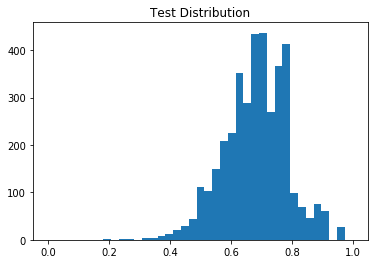

In [15]:
bins = np.linspace(0, 1, 40) # array with 40 evenly spaced numbers between 0 and 200

plt.hist(results['test'], bins)
plt.title('Test Distribution')
plt.show()

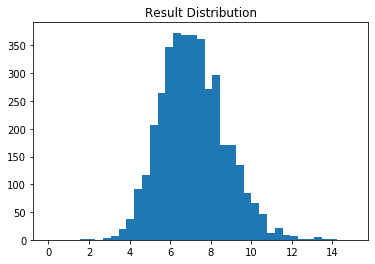

In [16]:
bins = np.linspace(0, 15, 40) # array with 40 evenly spaced numbers between 0 and 200

plt.hist(results['plus'], bins)
plt.title('Result Distribution')
plt.show()

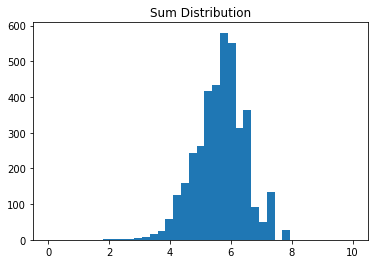

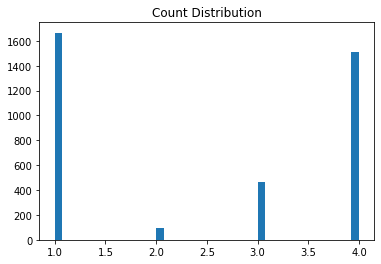

In [17]:
bins = np.linspace(0, 10, 40) # array with 40 evenly spaced numbers between 0 and 200

plt.hist(results['sum'], bins)
plt.title('Sum Distribution')
plt.show()

bins = np.linspace(1, 4, 40) # array with 40 evenly spaced numbers between 0 and 200

plt.hist(results['count'], bins)
plt.title('Count Distribution')
plt.show()

In [18]:
db = results.copy()

In [19]:
db.isnull().values.any()

False

In [20]:
db.pop('game')
db.pop('team')
y = db.pop('r')
X = db

In [21]:
#X['all'] = round(X.sum(axis = 1, skipna = True) / 13,2)

In [22]:
X.head(2)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p13,p14,s,sum,count,result,plus,test,test2,diff
0,0.71,0.89,0.74,0.71,0.48,0.89,0.77,0.52,0.50,0.48,...,0.0,0.0,1,7.11,1,6.46,8.11,0.87,0.2,2
1,0.93,0.92,0.91,0.86,0.41,0.78,0.65,0.64,0.46,0.70,...,0.0,0.0,1,7.73,1,7.03,8.73,0.95,0.2,2


In [23]:
#importing libraries from sklearn
from sklearn import tree
#from sklearn.datasets import make_classification
#from sklearn.decomposition import PCA
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn import model_selection
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler, MinMaxScaler#,Imputer
from sklearn import metrics

# import algorithm modules
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier#, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.metrics import precision_recall_fscore_support as score

In [26]:
a=[]

In [27]:
def train_rf(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est,
                                max_depth=depth,
                                min_samples_leaf = 5,
                                min_samples_split = 12,
                                n_jobs=-1)
    rf_model = rf.fit(X_train,y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred,average='macro') # pass the y labels to the score, the predicted, positive label; what we are predicting
    a.append([n_est,depth,round(precision, 3),round(recall, 3),round((y_pred==y_test).sum() / len(y_pred),3)])
    print(f'EST: {n_est} / depth: {depth} /precision: {round(precision, 3)} / recall: {round(recall, 3)} / accuracy: {round((y_pred==y_test).sum() / len(y_pred),3)}')

In [27]:
for n_est in [10,50,100,200]:
    for depth in [10,20,80,None]:
        train_rf(n_est,depth)

EST: 10 / depth: 10 /precision: 0.521 / recall: 0.542 / accuracy: 0.611
EST: 10 / depth: 20 /precision: 0.554 / recall: 0.562 / accuracy: 0.623
EST: 10 / depth: 80 /precision: 0.535 / recall: 0.551 / accuracy: 0.611
EST: 10 / depth: None /precision: 0.514 / recall: 0.54 / accuracy: 0.606
EST: 50 / depth: 10 /precision: 0.519 / recall: 0.554 / accuracy: 0.628
EST: 50 / depth: 20 /precision: 0.528 / recall: 0.551 / accuracy: 0.619
EST: 50 / depth: 80 /precision: 0.518 / recall: 0.544 / accuracy: 0.614
EST: 50 / depth: None /precision: 0.537 / recall: 0.555 / accuracy: 0.621
EST: 100 / depth: 10 /precision: 0.523 / recall: 0.557 / accuracy: 0.633
EST: 100 / depth: 20 /precision: 0.536 / recall: 0.555 / accuracy: 0.624
EST: 100 / depth: 80 /precision: 0.511 / recall: 0.549 / accuracy: 0.621
EST: 100 / depth: None /precision: 0.52 / recall: 0.55 / accuracy: 0.62
EST: 200 / depth: 10 /precision: 0.551 / recall: 0.564 / accuracy: 0.638
EST: 200 / depth: 20 /precision: 0.527 / recall: 0.55 / a

In [28]:
final = pd.DataFrame(a,columns=['estimators','depth','precision','recall','score'])
final.sort_values(by=['score','recall','precision'],ascending=False)

,estimators,depth,precision,recall,score
12,200,10.0,0.551,0.564,0.638
8,100,10.0,0.523,0.557,0.633
4,50,10.0,0.519,0.554,0.628
14,200,80.0,0.527,0.555,0.625
9,100,20.0,0.536,0.555,0.624
1,10,20.0,0.554,0.562,0.623
7,50,NaN,0.537,0.555,0.621
15,200,NaN,0.522,0.551,0.621
10,100,80.0,0.511,0.549,0.621
13,200,20.0,0.527,0.550,0.620


y_pred==y_test checks the list to see if this is true, then outputs False or True, sum() will add it up and then we divide by the length

precission - when it does identify spam, it is 100% correct
recall - of the spam that enters the mailbox, only 52% is placed in the spam filter box
accuracy - identifies mail as spam or ham

that missed 48% is not that great

In [29]:
#Random Forest Regression
def forestRegression_1(x,y):
    model = RandomForestClassifier(n_estimators = 200,
                                   min_samples_leaf = 5,
                                   min_samples_split = 12,
                                   random_state = 0,
                                   max_depth = 20,
                                   n_jobs=-1)
    model.fit(x, y)
    return model

rf = forestRegression_1(X_train, y_train)

In [30]:
def check(a,b):
    if a == b:
        result = '<'
    else:
        result = '-'
    return result

In [31]:
print('Random Forest',round(rf.score(X_train, y_train),2))

Random Forest 0.77


In [32]:
def print_pred_results(model,result,num):
    print('model : ', result, check(result,y_test.loc[num]))

def predictionTest(num,model1,model2):
    p = X_test.loc[num].tolist()
    result1 = model1.predict([p]).flatten()
    print('\nActual       : ',y_test.loc[num])
    print_pred_results(model1,result1,num)

In [33]:
def cycle_prob_test(num,model):
    p = X_test.loc[num].tolist()
    e = model.predict_proba([p]).flatten()
    return e.tolist()

def cycle_pred_test(num,model):
    p = X_test.loc[num].tolist()
    e = model.predict([p]).flatten()
    if e[0] == y_test.loc[num]:
        a = 1
    else:
        a = 0
    return a

def model_pred_test(model):
    pred = []
    prob = []
    numbers = X_test.index
    random_nums = random.choices(numbers, k=50)
    for i in random_nums:
        pred.append(cycle_pred_test(i,model)) # check to see if the values are correct and score it
        #prob.append(cycle_prob_test(i,model))
    dz = pd.DataFrame(pred)
    #df = pd.DataFrame(prob)
    c = str(float(dz.sum().values / 50))
    return c
    #print('score :',c)

In [34]:
print(model_pred_test(rf))

0.56


In [35]:
test_results = pd.DataFrame(index=range(10),columns=['Random Forest'])
test_results = test_results.fillna(0.0)

In [36]:
for i in range(10):
    r_s = model_pred_test(rf)
    test_results.at[i,'Random Forest'] = r_s

In [37]:
test_results.describe()

,Random Forest
count,10.000000
mean,0.644000
std,0.069154
min,0.540000
25%,0.600000
50%,0.630000
75%,0.695000
max,0.760000


In [39]:
import pickle
filename = 'models/cpl_roster_classifier_new.sav'
pickle.dump(rf, open(filename, 'wb'))

In [40]:
cpl_classifier_model = pickle.load(open(filename, 'rb'))

In [41]:
year = '2020'
team_ref = pd.read_csv('datasets/teams.csv')
results = pd.read_csv(f'datasets/{year}/cpl-{year}-results.csv')
stats = pd.read_csv(f'datasets/{year}/cpl-{year}-stats.csv')
player_info = pd.read_csv(f'datasets/{year}/player-{year}-info.csv')
results_brief = pd.read_csv(f'datasets/{year}/cpl-{year}-results_brief.csv')
team_stats = pd.read_csv(f'datasets/{year}/cpl-{year}-team_stats.csv')
schedule = pd.read_csv(f'datasets/{year}/cpl-{year}-schedule.csv')
rated_forwards = pd.read_csv(f'datasets/{year}/cpl-{year}-forwards.csv')
rated_midfielders = pd.read_csv(f'datasets/{year}/cpl-{year}-midfielders.csv')
rated_defenders = pd.read_csv(f'datasets/{year}/cpl-{year}-defenders.csv')
rated_keepers = pd.read_csv(f'datasets/{year}/cpl-{year}-keepers.csv')

# home side
q1 = schedule.iloc[3]['home']
# away side
q2 = schedule.iloc[3]['away']
print(q1,q2)

compare = cpl.get_team_comparison(results_brief,q1,q2)

t1_x, t1_y = cpl.get_NB_data(compare,q1)
t2_x, t2_y = cpl.get_NB_data(compare,q2)

game_info = schedule[schedule['home'] == q1]
game_info = game_info[game_info['away'] == q2]

game = game_info.iloc[0]['game']
game_h = cpl.get_home_away_comparison(stats,game,q1)
game_a = cpl.get_home_away_comparison(stats,game,q2)

h1_roster = cpl.get_compare_roster(results,q1,team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)
h2_roster = cpl.get_compare_roster(results,q2,team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)

def get_overall_roster(game_roster):
    b = []
    for i in range(game_roster.shape[0]):
        b.append(game_roster.iloc[i]['overall']) # get the player overall score for each player in the game
    if len(b) < 16:
        i = int(16 - len(b))
        for j in range(0,i):
            b.append(0)
    db = pd.DataFrame(b[0:14])
    db = db.T
    return db

q1_roster = get_overall_roster(h1_roster)
print(q1_roster)

q2_roster = get_overall_roster(h2_roster)
print(q2_roster)

def roster_pred(model,array):
    prediction = model.predict_proba([array]).flatten()
    df = pd.DataFrame(prediction)
    #print('score :',prediction)
    return df

home_win, draw, away_win = cpl.get_match_prediction(q1,q2,t1_x,t1_y,t2_x,t2_y)

home_win_new, away_win_new, draw_new = cpl.get_final_game_prediction(cpl_classifier_model,q1_roster,q2_roster,home_win,away_win,draw)

print(q1,'\nwin probability: ', round(home_win_new,2))

print(q2,'\nwin probability: ', round(away_win_new,2))

print('Draw probability: ', round(draw_new,2))

q1_prediction = roster_pred(cpl_classifier_model,q1_roster)
q2_prediction = roster_pred(cpl_classifier_model,q2_roster)

q_draw = (q1_prediction.iloc[1][0] + q2_prediction.iloc[2][0]) /2

q1_p = round(q1_prediction.iloc[2][0],2)
q2_p = round(q2_prediction.iloc[2][0],2)

if q1_p > q2_p:
    print(q1,'predicted to win ',q1_p)
elif q2_p > q1_p:
    print(q2,'predicted to win ',q2_p)
else:
    print('A Draw is predicted ',q1_p,' ',q2_p)

total_ = q1_p + home_win + q2_p + away_win + q_draw + draw
print(round((q1_p + home_win) / total_, 2))

print(round((q2_p + away_win) / total_, 2))

print(round((q_draw + draw) / total_, 2))

def get_final_game_prediction(model,q1_roster,q2_roster,home_win,away_win,draw):
    q1_prediction = roster_pred(model,q1_roster)
    q1_p = round(q1_prediction.iloc[2][0],2)
    q2_prediction = roster_pred(model,q2_roster)
    q2_p = round(q2_prediction.iloc[2][0],2)
    q_draw = (q1_prediction.iloc[1][0] + q2_prediction.iloc[2][0]) / 2
    total_ = q1_p + home_win + q2_p + away_win + q_draw + draw
    h_w = round((q1_p + home_win) / total_, 2)
    a_w = round((q2_p + away_win) / total_, 2)
    g_d = round((q_draw + draw) / total_, 2)
    return h_w, a_w, g_d

home_win_new, away_win_new, draw_new = get_final_game_prediction(cpl_classifier_model,q1_roster,q2_roster,home_win,away_win,draw)

print('home win prob',home_win_new,'away win prob',away_win_new,'draw prob',draw_new)

HFX Wanderers FC Valour FC


/home/todd/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


IndexError: index 0 is out of bounds for axis 0 with size 0